In [1]:
# spaCy-is an open-source adv NLP,developed by Matthew Honnibal and Ines Montani.

In [ ]:
# !pip install spacy

In [108]:
import spacy
import pandas as pd
import sys
import re
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Containers are spaCy objects that contain a large quantity of data about a text. the list are below
# Doc, DocBin, Example, Language, Lexeme, Span, SpanGroup, Token

# Doc −it is an object in spaCy’s architecture and owns the sequence of tokens along with all their annotations.

# Span - slicing a part in doc[start : end]

# Token - An individual token — i.e. a word, punctuation symbol, whitespace, etc.


In [4]:
# spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also 
# referred to as the processing pipeline. The pipeline used by the trained pipelines typically include pretrained models 
# a "tagger, a lemmatizer,a parser and an entity recognizer".

In [5]:
# spaCy’s trained pipelines can be installed as Python packages.

# !python -m spacy download en_core_web_sm
# !python -m spacy download en_core_web_md
# !python -m spacy download de_core_news_sm

In [6]:
# nlp = spacy.load("en") #shortcut link
nlp= spacy.load("en_core_web_sm") #package (English small model)
# nlp= spacy.load("/path/to/en") #Unicode path
# nlp= spacy.load(Path("/path/to/en")) #pathlib path
# nlp= spacy.load("en_core_web_sm", disable=["parser", "tagger"]) #with all the arguments
# import en_core_web_sm
# nlp= en_core_web_sm.load()

In [50]:
# nlp.disable_pipes('tagger', 'parser')
nlp.analyze_pipes() # with syntax of pipes
#nlp.add_pipe(nlp.create_pipe("merge"),after="tagger") #creating pipes and adding to existing list. postion mentioned.
# nlp.lang  # the language used
print("Pipeline:", nlp.pipe_names) # all pipes

Pipeline: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [8]:
#If a trained pipeline is available for a language, you can download it as above and load
#In order to use languages that don’t yet come with a trained pipeline, you have to import them directly, or with blank:
 
from spacy.lang.en import English
nlp = English()# use directly

# nlp = spacy.blank("en")  # creating blank model with 2 letter language code,the object comes with tokenizer

In [9]:
# difference
n1 = spacy.blank("en")
for i in n1("hello everyone, it's a wonderful day today"):
    print(i.text, i.lemma_, i.is_stop, i.pos_)
print("--------------------------------")
n = spacy.load("en_core_web_sm") 
for i in n("hello everyone, it's a wonderful day today"):
    print(i.text, i.lemma_, i.is_stop, i.pos_)

hello  False 
everyone  True 
,  False 
it  True 
's  True 
a  True 
wonderful  False 
day  False 
today  False 
--------------------------------
hello hello False INTJ
everyone everyone True PRON
, , False PUNCT
it it True PRON
's be True AUX
a a True DET
wonderful wonderful False ADJ
day day False NOUN
today today False NOUN


In [10]:
# spacy.info()    #provides information nlp.meta
# spacy.info("en_core_web_sm")
# spacy.info("en_core_web_sm", markdown=True)

In [11]:
# spacy.explain("NORP") #give us a description

In [12]:
# spacy.prefer_gpu(), spacy.require_gpu() used for gpu mode.

In [32]:
s= """The economic situation of the 
country is on edge , as the stock 
market crashed causing loss of millions.name : Shashank age: 54 email: shank@rediffmail.com Citizens who had their main 19% investment 
in the share-market are facing a great loss. Many 2000 companies might lay off 
thousands of people to 2009 reduce labor cost, name : pratham parmar age: 15 email : parmar15@yahoo.com
                 """

In [114]:
#lowercase the text to reduce the size of the vocabulary of our text data
s.lower()

#We can remove numbers.
result = re.sub(r'\d+', '', s)\

#convert the numbers into their textual representations.

import inflect
p = inflect.engine()
p.number_to_words(5)

'five'

In [33]:
#Creating a Doc Container
doc=nlp(s)

In [67]:
print(type(doc))
print(type(doc[:5]))
token=doc[2]
print(type(token))

<class 'spacy.tokens.doc.Doc'>
<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.token.Token'>


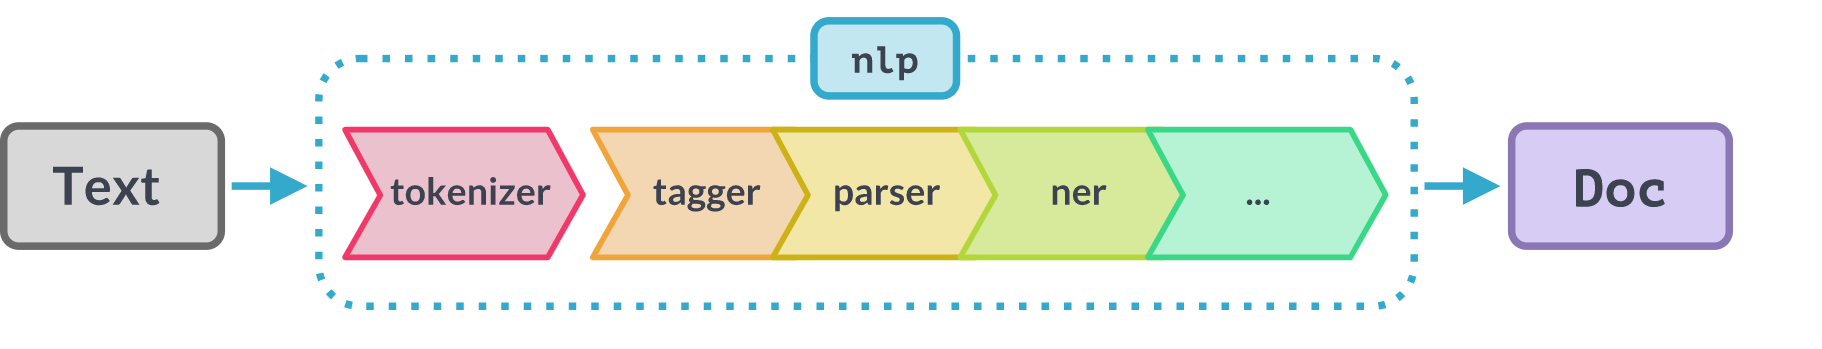

In [16]:
doc

The economic situation of the 
country is on edge , as the stock 
market crashed causing loss of millions.name : Shashank age: 54 email: shank@rediffmail.com Citizens who had their main 19% investment 
in the share-market are facing a great loss. Many 2000 companies might lay off 
thousands of people to 2009 reduce labor cost, name : pratham parmar age: 15 email : parmar15@yahoo.com
                 

In [17]:
#Tokenization :Tokenization is the task of splitting a text into meaningful segments, called tokens.
print(len(s))
print(len(doc)) # all are tokens

403
76


In [18]:
for i in s[:15]: # by slicing
    print(i)
print("----------")
for token in s.split(' ')[:10]: #using split() by whitespace. this wont remove all
    print(token)

T
h
e
 
e
c
o
n
o
m
i
c
 
s
i
----------
The
economic
situation
of
the

country
is
on
edge
,


In [19]:
for i in doc[:8]:
    print(i) #Tokens are something that has syntactic purpose in a sentence and is self-contained.
             #These removes all white spaces, punctuations ..etc., but not newlines and some other for that we do textcleaning
             # lets look after cleaning of the lengths len and see after cleaning in the below.

The
economic
situation
of
the


country
is


In [20]:
#Text Cleaning or Preprocessing:you have punctuation like commas, brackets,, full stop and some extra white spaces too.
doc_c = [token for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

for token in doc_c[:5]:
    print(token.text)
    
print("len-->",len(doc))
print("len-->",len(doc_c))


# #Token Attributes

# token.text  : Verbatim text content
# token.head  : syntactic parent, or “governor”, of this token
# token.left_edge  : leftmost token of this token’s syntactic descendants
# token.right_edge  : rightmost token of this token’s syntactic descendants
# token.ent_type  : Named entity type: return an integer that corresponds to an entity type
# token.ent_type_  : Named entity type: _ will give you the string equivalent
# token.ent_iob_  : IOB code of named entity tag. “B” means the token begins an entity, “I” means it is inside an entity, “O” means it is outside an entity, and "" means no entity tag is set.
# token.lemma_  : Base form of the token, with no inflectional suffixes
# token.pos_  : Coarse-grained part-of-speech from the Universal POS tag set
# token.dep_  : Syntactic dependency relation
# token.lang_  : Language of the parent document’s vocabulary
# token.morph  : Morphological analysis

# token.is_stop
# token.idx      :token id
# token.is_punct :punctuation
# token.is_space : space
# token.is_alpha : Returns True if the token is an alphabet
# token.is_ascii : Returns True if the token belongs to ascii characters
# token.is_digit : Returns True if the token is a number(0-9)
# token.is_upper : Returns True if the token is upper case alphabet
# token.is_lower : Returns True if the token is lower case alphabet
# token.is_space : Returns True if the token is a space ‘ ‘
# token.is_bracket : Returns True if the token is a bracket
# token.is_quote : Returns True if the token is a quotation mark
# token.like_url : Returns True if the token is similar to a URl (link to website)
# token.like_email
# token.like_num
# token.tag_  :detailed POS tag, how words are dependeded on each other
# token.shape_
# token.text_with_ws :
# token.is_bracket
# token.is_quote
# token.is_currency
# token.Sentiment
# token.Rank
# token._  #user space for adding custom attribute extensions.

economic
situation
country
edge
stock
len--> 76
len--> 39


In [46]:
# Word Frequency: common words or unique words in the text
word_freq = Counter(doc_c)
# 5 commonly occurring words with their frequencies
common_words = word_freq.most_common(5)
print(common_words)
# Unique words
unique_words = [word for (word, freq) in word_freq.items() if freq == 1]
print (unique_words)

[(economic, 1), (situation, 1), (country, 1), (edge, 1), (stock, 1)]
[economic, situation, country, edge, stock, market, crashed, causing, loss, millions.name, Shashank, age, 54, email, shank@rediffmail.com, Citizens, main, 19, investment, share, market, facing, great, loss, 2000, companies, lay, thousands, people, 2009, reduce, labor, cost, pratham, parmar, age, 15, email, parmar15@yahoo.com]


In [41]:
#Part of Speech Tagging (POS)
rows=[]
cols = ("text","POS","Explain","tag","Dep","Shape","Alpha","stopword")
for token in doc:
    row=token.text,token.pos_,spacy.explain(token.pos_),token.tag_,token.dep_,token.shape_,token.is_alpha,token.is_stop
    rows.append(row)
df = pd.DataFrame(rows,columns=cols)
print(df[:5])

        text   POS     Explain tag    Dep Shape  Alpha  stopword
0        The   DET  determiner  DT    det   Xxx   True      True
1   economic   ADJ   adjective  JJ   amod  xxxx   True     False
2  situation  NOUN        noun  NN  nsubj  xxxx   True     False
3         of   ADP  adposition  IN   prep    xx   True      True
4        the   DET  determiner  DT    det   xxx   True      True


In [40]:
# pip install beatifultable
from beautifultable import BeautifulTable
table=BeautifulTable()
# table.rows.header = ["1", "2", "3", "4", "5"....] # if needed index we can specify
table.columns.header = ["text","POS","Explain","tag","Dep","Shape","Alpha","stopword"]
for token in doc:
    table.rows.append([token.text,token.pos_,spacy.explain(token.tag_),token.tag_,token.dep_,token.shape_,token.is_alpha,token.is_stop])

print(table[:10])

+------+-------+--------------------------+-----+-------+-------+-------+------+
| text |  POS  |         Explain          | tag |  Dep  | Shape | Alpha | stop |
|      |       |                          |     |       |       |       | word |
+------+-------+--------------------------+-----+-------+-------+-------+------+
| The  |  DET  |        determiner        | DT  |  det  |  Xxx  |   1   |  1   |
+------+-------+--------------------------+-----+-------+-------+-------+------+
| econ |  ADJ  | adjective (English), oth | JJ  | amod  | xxxx  |   1   |  0   |
| omic |       | er noun-modifier (Chines |     |       |       |       |      |
|      |       |            e)            |     |       |       |       |      |
+------+-------+--------------------------+-----+-------+-------+-------+------+
| situ | NOUN  |  noun, singular or mass  | NN  | nsubj | xxxx  |   1   |  0   |
| atio |       |                          |     |       |       |       |      |
|  n   |       |            

In [62]:
# Morphology: Inflectional morphology is the process by which a root form of a word is modified by adding prefixes or suffixes 
# that specify its grammatical function but do not change its part-of-speech. We say that a lemma (root form) is inflected 
# (modified/combined) with one or more morphological features to create a surface form.

# Morphological features are stored in the MorphAnalysis under Token.morph which allows you to access individual morphological features.
token = doc[7]
print(token.text)
print(token.morph)  
print(token.morph.get("Tense"))

#Rule-based morphology  :it uses the token text and fine-grained POS tags to produce coarse-grained POS tags and morphological features.
print(token.morph)
print(token.pos_) 

is
Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
['Pres']
Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
AUX


In [120]:
#Stemming
from nltk.stem import PorterStemmer
p = PorterStemmer()
words = ['Connects','Connecting','Connections','Connected','Connection','Connectings','Connect']
for word in words:
    print(word,"--->",p.stem(word))

Connects ---> connect
Connecting ---> connect
Connections ---> connect
Connected ---> connect
Connection ---> connect
Connectings ---> connect
Connect ---> connect


In [146]:
#Lemmatization is the method of converting a token to it’s root/base form. “played”, “playing”, “plays”, “play”.

for token in doc[:5]:
    print(token.text,"<---->",token.lemma_)
    
#two pipeline components for lemmatization.
# -> Lemmatizer : provides lookup and rule-based lemmatization methods in a configurable component. 
# -> EditTreeLemmatizer

print(nlp.pipe_names)
print(nlp.get_pipe("lemmatizer").mode)

#Lookup lemmatizer :For pipelines without a tagger or morphologizer, a lookup lemmatizer can be added to the pipeline as 
                    #long as a lookup table is provided.it looks up the token surface form in the lookup table without 
                    #reference to the token’s part-of-speech or context.

# nlp = spacy.blank("en")
# nlp.add_pipe("lemmatizer", config={"mode": "lookup"}).initialize()
# print(nlp.get_pipe("lemmatizer").mode)

# Rulebased lemmatizer :it maps the surface form to a lemma in light of the previously assigned coarse-grained pos and 
                       # morphological information, without consulting the context of the token. The rule-based lemmatizer
                       # also accepts list-based exception files. For English, these are acquired from WordNet.
        
# nlp = spacy.blank("en")
# nlp.add_pipe("lemmatizer", config={"mode": "rule"}).initialize()
# print(nlp.get_pipe("lemmatizer").mode)


#EditTreeLemmatizer(Trainable lemmatizer): can learn form-to-lemma transformations from a training corpus that includes 
                        #lemma annotations. This removes the need to write language-specific rules and can (in many cases) 
                        #provide higher accuracies than lookup and rule-based lemmatizers.
        
# nlp = spacy.blank("de")
# nlp.add_pipe("trainable_lemmatizer", name="lemmatizer")

The <----> the
economic <----> economic
situation <----> situation
of <----> of
the <----> the
['lemmatizer']
rule
rule


In [101]:
#Sentence Boundary Detection (SBD) - identification of sentences Doc container, we can use the attribute sents.
sents =list(doc.sents)#sents attribute is a generator.we can usually iterate over generators by converting them into a list.
for sent in sents:
    print("=>", sent)
    print(sent.start,sent.end)
    print(sent.lemma_)        # sentence lemmatization

=> The economic situation of the 
country is on edge , as the stock 
market crashed causing loss of millions.name : Shashank age: 54 email: shank@rediffmail.com
0 29
the economic situation of the 
country be on edge , as the stock 
market crash cause loss of millions.name : Shashank age: 54 email: shank@rediffmail.com
=> Citizens who had their main 19% investment 
in the share-market are facing a great loss.
29 49
citizen who have their main 19% investment 
in the share-market be face a great loss.
=> Many 2000 companies might lay off 
thousands of people to 2009 reduce labor cost, name : pratham parmar age: 15 email : parmar15@yahoo.com
                 
49 76
many 2000 company might lay off 
thousand of people to 2009 reduce labor cost, name : pratham parmar age: 15 email : parmar15@yahoo.com


In [102]:
#StopWords
from spacy.lang.en.stop_words import STOP_WORDS
stopwords=list(STOP_WORDS)
for sent in sents:
    for token in sent: 
        if token.text not in stopwords:
            if token.is_space == False and not token.is_punct:
                print(token)
    break  # -- working on single sentense so wont move to next

The
economic
situation
country
edge
stock
market
crashed
causing
loss
millions.name
Shashank
age
54
email
shank@rediffmail.com
